# Training Models

## Linear Regression

### Normal equation  
teta_hat = (Xt X)-1 Xt y

In [1]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

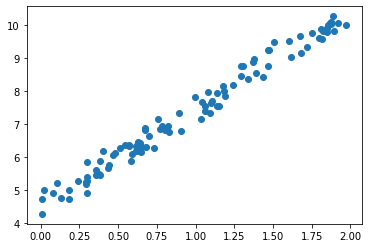

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [3]:
X_intercept = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
theta_best

array([[4.53491703],
       [2.92903953]])

The function that we plot is y = 4 + 3x1 + Gaussian Noise, so we would have hoped for theta0 = 4 and theta1 = 3

In [4]:
X_new = np.array([[0],[2]])
X_new_intercept = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_intercept.dot(theta_best)

In [5]:
y_pred

array([[ 4.53491703],
       [10.39299609]])

(0.0, 2.0, 0.0, 15.0)

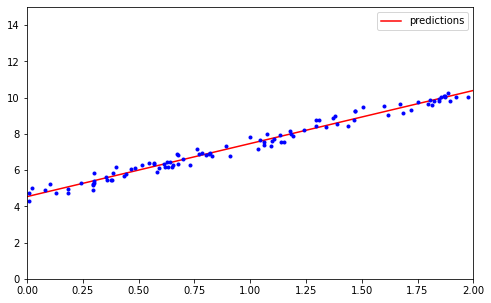

In [6]:
plt.figure(figsize=(8,5))
plt.plot(X_new, y_pred, 'r-',label='predictions')
plt.plot(X, y, "b.")
plt.legend()
plt.axis([0, 2, 0, 15])

Linear Regression using Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)
print("Intercept: {}, Coeff:{}".format(lr_model.intercept_, lr_model.coef_)) # We find the same parameters as before
lr_model.predict(X_new)

Intercept: [4.53491703], Coeff:[[2.92903953]]


array([[ 4.53491703],
       [10.39299609]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=1e-6)
theta_best_svd

array([[4.53491703],
       [2.92903953]])

This function computes theta_hat = X+ y, where X+ is the *pseudoinverse* of X. 

In [9]:
np.linalg.pinv(X_intercept).dot(y)

array([[4.53491703],
       [2.92903953]])

Computational complexitiy: 
* Normal equation: O(n^2.4)
* Using svd : O(n^2)

## Gradient Descent

### Batch gradient descent

*Gradient descent step* :   
Theta+1 = Theta - eta * Derivée de MSE(Theta), où eta est le learning rate et theta le vecteur des paramètres 

In [10]:
eta = .1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # randn() generates an array from the normal distribution N(0,1)

for n in range(n_iterations):
    gradients = 2/m * X_intercept.T.dot(X_intercept.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.53491703],
       [2.92903953]])

That's exactly what we found using the Normal Equation!  

How to chose the correct number of iterations? Choose a very high number of iterations but stop the algorithm when your gradients vector is getting very small, i.e when values are less than an epsilon value, called the *tolerance*   

Convergence rate:  
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while. It can take 0(1/epsilon) iterations. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step.  
At opposite, SGD picks a random instance in the training set at every step and computes the gradient only on that single instance.   
This obviously gets the computation time way faster but on the other hand do its stochastic nature, this algorithm is much less regular than BGD.  

One solution to this dilemma is to gradually reduce the learning rate. The function that determines the learning rate at each iteration is called the *learning schedule*


In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_intercept[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta - eta*gradients
theta

array([[4.53760441],
       [2.93662694]])

**Warning note:**  When using SGD, the training instances must be independent and idenically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average.  
A simple way to ensure this is to shuffle the instances during training (pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances, for-example, if the instances are sorted by label then SGD will start by optimizing for one label, then the next one...

In [12]:
# SGD LR with maximum 1000 epochs, stop when the loss drop by less thant 0.001, with a lr starts with 0.1 and a default learning schedule, and no regularization (penality = None)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() is for flatten
sgd_reg.intercept_, sgd_reg.coef_ # Once again we find a solution quite close to the one returned by the Normal Equation

(array([4.51992979]), array([2.94953375]))

### Comparison of algorithms for Linear Regression

| Algorithm       | Large m | Out-of-core support | Large n | Hyperparams                       | Scaling required | Scikit-learn     |
|-----------------|---------|---------------------|---------|-----------------------------------|------------------|------------------|
| Normal Equation | Fast    | No                  | Slow    | 0                                 | No               | N/A              |
| SVD             | Fast    | No                  | Slow    | 0                                 | No               | LinearRegression |
| Batch GD        | Slow    | No                  | Fast    | 2 (learning rate, tolerance rate) | Yes              | SGDRegressor     |
| Stochastic GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |
| Mini-Batch GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |

## Polynomial Regression

What if your date is more complex than a simple straight line? Surprisingly, you can use linear model to fit unlinear data. A simple way to do this is to add powers of each features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*

In [13]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

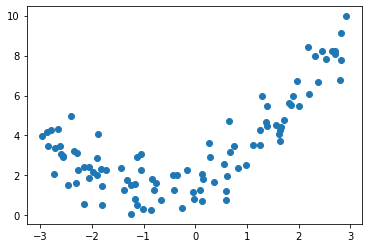

In [14]:
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let's use Scikit-learn's *PoylynomialFeatures* to transform our training data, adding the quare of each feature in the training st as a new feature. 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0])

[-0.75275929  0.56664654]


In [16]:
X_poly[:3]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281]])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

y_hat = 0.49 x1^2 + 0.99 x1 + 2.49 when if fact the function was y = 0.5 x1^2 + 1 * x1 + 2 + Gaussian noise 

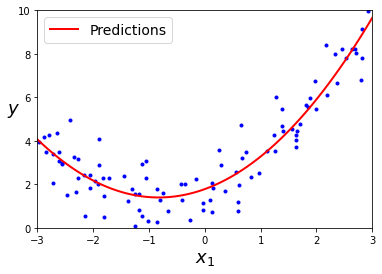

In [18]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression

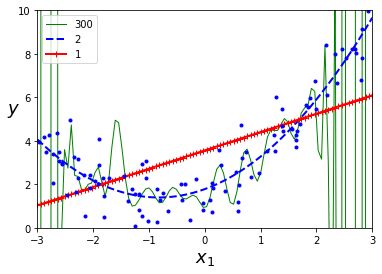

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

This 300 degree polynomial model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.   
But in general, you won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?   
Two solutions: 
* Cross validation
* look at the *learning-curves*

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label="val")
    plt.legend()

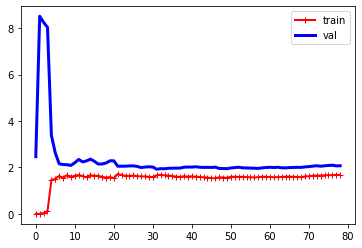

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

This model that's underfitting deserves a bit of explanation.  
First, let's look at the performance on the training data: when there ara just one of two instances in the training set, the model can fit them perfectly, which is why the red curve starts at zero.  But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it's not linear at all. So the error on the training data goes up until it reaches a plateau, at wihch point adding new instances to the training set doesnt make the average error much better or worse.  
Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapble of generalizing properly, which is why the validation error is initially quite big? Then, as the model is shown more training examples, it learns, thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up as a plateau, very close to the other curve.

The learning curves are typical of a model that's underfitting. Both curves have reached a plateau, they are close and fairly high.

**Tips**: If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

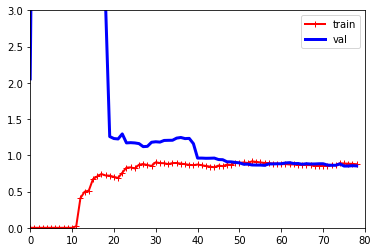

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

### *The Bias/Variance Trade-off*

**Bias**:   

This part of the generalization error is due to to wrong assumptions, such as assumping that the data is linear when it is actually quadratic. A high-ias model is most likely to underfit the training data.   



**Variance**:  

This part is due to model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynmodial model) is likely to have high variance and thus overfit the training data



**Irreducible error**: 

This part is due to the noisiness of the data itself. The only way toreduce this part of the error is to clean up the data  


Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a trade-off.


## Regularized Linear Models

As we saw previously, a good way to reduce overfitting is to regularize the model: the fewer degrees of freedom it has, the harder it will for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression and Elastic Net, which implement three different ways to constrain the weights.

### Ridge Regression (L2 regularization)

**Info**: It is quite common for the cost function used during different from the performance measure used for testing. Apart from regularization, another reasn they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. For example, classifiers are often trained using a cost function such as the log loss but evaluated using precision/recall.

**Warning note**:  
It is important to scale the data (e.g, using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

In [23]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [25]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

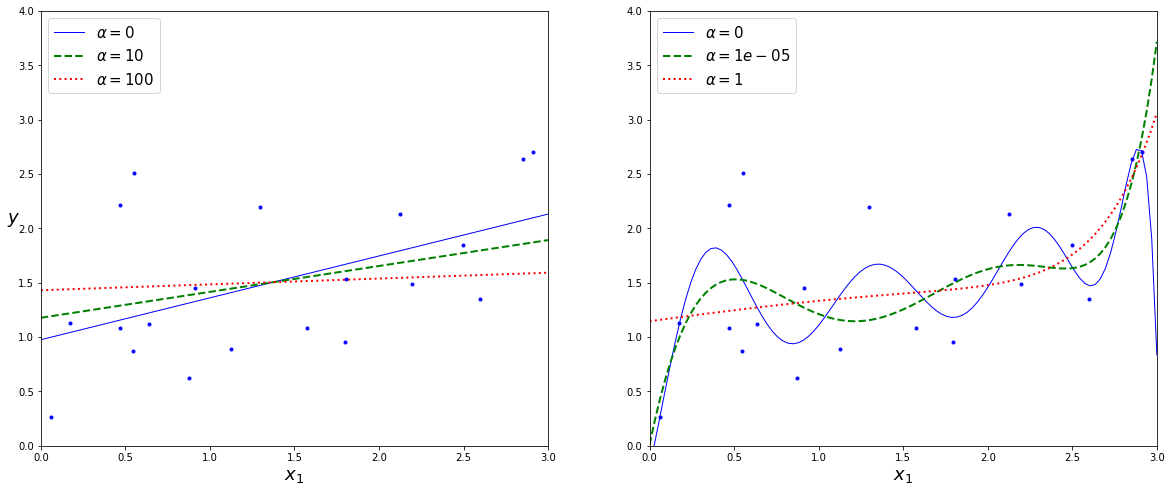

In [26]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(20,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

As with Linear Regression, we can perform Ridge Regression either by computing closed-form equation or by performing Gradient Descent. The pros and cons are the same. 

In [27]:
# closed-form using scikit-learn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [28]:
# using SGD
sgd_reg = SGDRegressor(penalty='l2') # penalty parameter sets the type of regularization to use
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

### Lasso Regression (L1 regularization)

*Least Absolute Shrinkage and Selection Operator Regression* is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


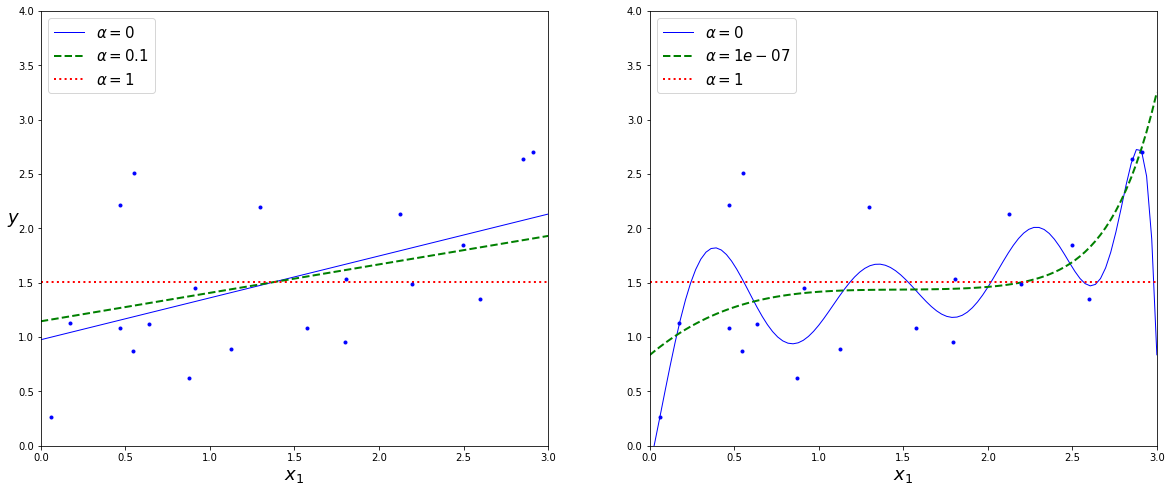

In [29]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(20,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

Lasso regression is trends to elimantes the weights of the least important features. It automatically performs feature selection and outputs a sparse model

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio *r*. When r=0, Elastic Net is equivalent to Ridge Regression and when r=1, its equivalent to Lasso Regression

In [31]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Logistic Regression

### Estimating Probabilities

$\hat{p} = h_{\theta}(x) = \sigma(x^{T} \theta)$ where $\sigma(x)$ is the logistic function :   
$\sigma(t) = \frac{1}{1 + \exp{-t}}$

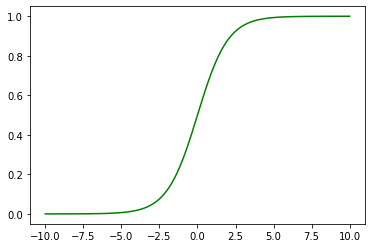

In [43]:
# 100 linearly spaced numbers
x = np.linspace(-10,10,1000)

# the function, which is y = x^3 here
y = 1 / (1 + np.exp(-x))
plt.plot(x,y, 'g')

### Training and Cost function

The objective of training is to set the parameter vector $\theta$  so that the model estimates high probabilities for posotive instance (y=1) and low probabilities for negative instances (y=0). This idea is captured by the cost function shown below:  
$c(\theta) = -log(\hat{p})$ if y = 1 ; $-log(1 - \hat{p})$ if y = 0

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0.5, 1.0, '-log(1 - x)')

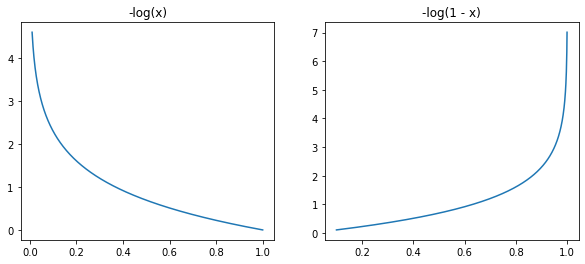

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(121)
x = np.linspace(0.01,1, 1000)
y = - np.log(x)
plt.plot(x,y)
plt.title("-log(x)")
plt.subplot(122)
x = np.linspace(0.1,1, 1000)
y = - np.log((1 - x))
plt.plot(x,y)
plt.title("-log(1 - x)")

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the *log loss*: 

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)} )]$ 

Bad news: there is no closed-form equation that compute the value of \theta that minimises this cost function.   
Good news: this cost function is convex, so Gradient Descent is guaranteed to find the global minimum.   


The partial derivatives of the cost functin with regard to the $j^{th}$ model parameter $\theta_j$ are given by this equation:

$\frac{\delta}{\delta \theta_j J(\theta)} = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^{T} x^{(i)}) - y^{(i)}) x_j^{(i)} $ 

### Decision Boundaries

In [77]:
# lets try to build a classifier to detect Iris virginica type based only on the petal width feature

from sklearn import datasets

iris = datasets.load_iris()
print("keys:",list(iris.keys()))
print("features names:",iris["feature_names"])

X = iris["data"][:, 3:] # petal width 

print("target names:",iris["target_names"])
y = (iris["target"] == 2).astype(np.int) # 1 if Iris are virginica else 0

keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


/usr/local/lib/python3.7/site-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


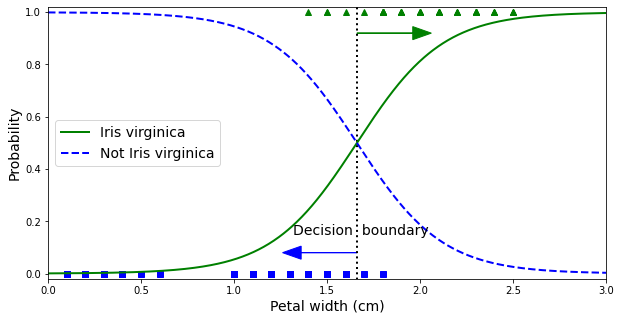

In [93]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

#Let's look at model's estimated probabilities for flowers with petal width varying from 0 to 3cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

There is a *decision boundary* at around 1.6cm where both probabilties are equal to 50%: if the petal width is gihthan than 1.6cm; the classifier will predict that the folwer is  an *Iris virginica*, and otherwise it will predict that is not

In [107]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

(2.9, 7.0, 0.8, 2.7)

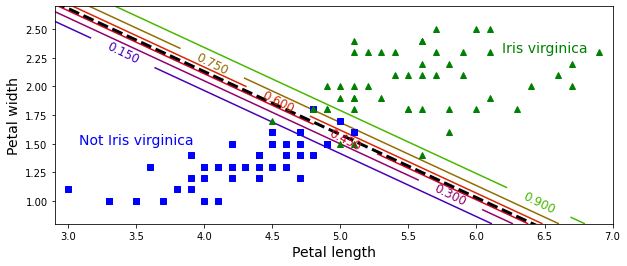

In [108]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

## Softmax regression

Cross entropy function: $J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log(\hat{p}_{k}^{(i)})$

**Cross entropy** 

Cross entropy orginated from information theory. Suppose you want to efficiently transmit information about the weither every day. If there are eight options (sunny, rainy, etc.), you could encode each option using three bits because 2^3 = 8. However, if you think it will be sunny almost every day, it would be much more efficient to code "sunny" on one bite (0) and the other seven opions on four bits (starting with a 1). Cross entropy measure the average number of bits you actually send per option. If your assumption about the weither is perfect, cross entropy will be equal to the entropy of the weather itself. But if your assumptions are wrong (e.g if it rains often), cross entropy will be greater by an amount called the Kullback-Leibler(KL) divergence.  

The cross entropy between two probability distributions *p* and *q* is defined as $H(p,q) = - \sum_{x} p(x) \log q (x)$




In [111]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

#iris with petal 5cm long and 2cm wide
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


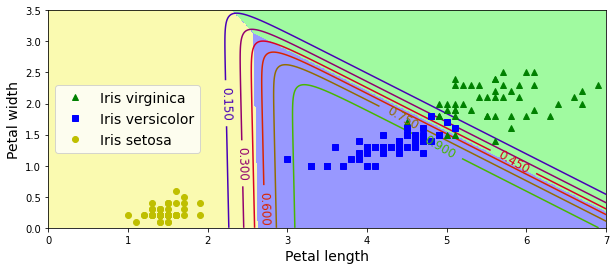

In [113]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


## Exercises 

1. Wich linear regression training algorithm can you use if you have a training set with millions of features?

> Stochastic gradient descent or mini-batch gradient descent. But not normal-equation or SVD approach because the computationnal complexity grows more than quadratically with the number of features.

2. Suppose the features in your training set have very different scales. Which algorithm might suffer from this, and how ? What can you do about it?

> If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before traninig the model. Note that the normal equation of SVD approach will work just fine without scaling. Morevore, regularized models may converge to a suboptimal solution if the features are not scaled: since regulzations penalize large weights, features with smaller values will tend to be ignored compared to features with larger values. 

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression Model? 

> No because the cost function (cross entropy or log loss) are convex. So there is only a global minimum.

4. Do all Gradient descent algoritms lead to the same model, provided you let them run long enough?

> Depending if the function is convex, cuz the SGD can find another local minimum than the BGD

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validaiton error consistenly goes up, what is likely going on? How can you fix this?

> Either you're overfitting (in case your training error is small), so you might use regularization (l1 or l2). Or you're using a learning rate too large, that jumps above the global minimum, so you should reduce slowly the learning rate.

6. Is it a good idea to stop Mini-batch gradient descent immediatly when the validation error goes up? 

> Due to their random nature, neither Stochastic GD or Mini-batch GD is guaranteed to make progress at every single training iteration. So if you immediatly stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a along time, you can revert to the best saved model. 

7. Which Gradient Descent algorithm will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

> SGD has the fasted traning iteration since it considers only one traning instance at a time, so it is generally the first to reach the vicinity of the gobal optimum. However, only BGD will actually converge, given enough training time. As mentioned, SDG and Mini-batch GD will bounce around the global otpimum, unless you gradually reduce the learning rate. 

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between training error and the validaiton error. What is happening? What are the three ways to solve this? 

> Overfitting ! 3 solutions: more data, regularization, reduce the polynmial degree to reduce complexity

9. Suppose you are using Ridge Regression and you notice that the traning error and the validation error are almost equal and fairly high. Would you say the that model suffers from high biais or high variance? Should you increase the regularization hyperparameter $\alpha$ or reduce it?

> You are underfitting. You must reduce your $\alpha$ hyperparameter ! 

10. Why would you want to use: 

  *  Ridge Regression instead of plain Linear Regression? 
  > A regularized model typically performs better than a model without any regularization.
  
  * Lasso instead of Ridge regression? 
  
  > Lasso uses an $l_1$ penalty, which trends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the mode important weights. This is a wayto perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
  
  * Elastic Net instead of lasso?
  
  > Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than traning intstances). However, it does add an extra hyper-parameter to tune. If you want Lasso without erratic behavior, you can just use Elastic Net with an `l1_ratio` close to 1.
  
11. Suppose you want classifier pictures as outdoor/indoor and daytime/nightime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
  
  > 2 logistic regression as it's a multi-label classification problem.
  
12. Implement Batch GD with early stopping for Softmax Regression

In [170]:
#load data 

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

# add the intercept column 
X_with_intercept = np.c_[np.ones([len(X),1]),X]

#lets put the random seed so that the outputs are reproducible
np.random.seed(2042)

# split train, test and validation sets

validation_ratio = .2
test_ratio = .2
total_size = len(X_with_intercept)

validation_size = int(validation_ratio * total_size)
test_size = int(test_ratio * total_size)
train_size = total_size - validation_size - test_size

rdn_indices = np.random.permutation(total_size)

X_train = X_with_intercept[rdn_indices[:train_size]]
y_train  = y[rdn_indices[:train_size]]
X_valid = X_with_intercept[rdn_indices[train_size:-test_size]]
y_valid = y[rdn_indices[train_size:-test_size]]
X_test = X_with_intercept[rdn_indices[-test_size:]]
y_test = y[rdn_indices[-test_size:]]

In [177]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)


def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums


n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

# training part 
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [178]:
Theta


array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [179]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [184]:
# add some regularization
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.038280239064085
500 0.5322201822520979
1000 0.5035315271928776
1500 0.49465903889629914
2000 0.49128501840330063
2500 0.4898942482434113
3000 0.48929688012374906
3500 0.48903415693372504
4000 0.4889169279611999
4500 0.4888641374714865
5000 0.48884022294122387


In [182]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [183]:
# with early stopping 
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


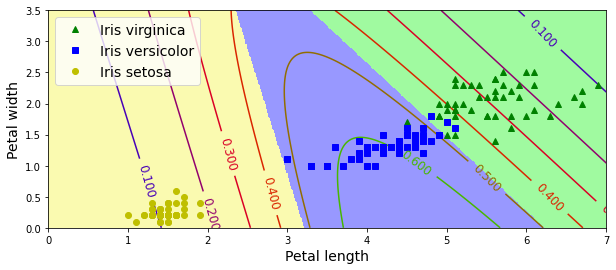

In [185]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [186]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333